In [3]:
import pandas
import numpy
import matplotlib.pylab
import pymysql

In [16]:
conn = pymysql.connect("127.0.0.1","root","root","pythontestdb") 
taobao_data = pandas.read_sql("select * from taob where price<600 and comment<200" ,con=conn)

In [6]:
taobao_data.head()

,title,link,price,comment
0,买2袋减2元 印尼进口菲那菲娜虾味木薯片油炸大龙虾片零食品400g,https://item.taobao.com/item.htm?id=44350560220,50,2577
1,零食大礼包送女友一箱整箱好吃的休闲小吃组合混合装生日吃货进口,https://item.taobao.com/item.htm?id=528296696972,116,286692
2,牛肉干内蒙古牛肉粒特产零食手撕五香牛肉粒干片500g克包邮xo酱烤,https://item.taobao.com/item.htm?id=539655516205,88,567
3,爱尝泡鸭爪鸭掌福建龙岩特产下洋土楼卤味零食香辣泡爽泡椒泡爪,https://item.taobao.com/item.htm?id=520224855651,118,30664
4,30包湖南特产显峰嚼味鱼霸香辣小鱼仔麻辣零食鱼干口水毛毛鱼,https://item.taobao.com/item.htm?id=44752472349,40,6543


### 绘制散点图

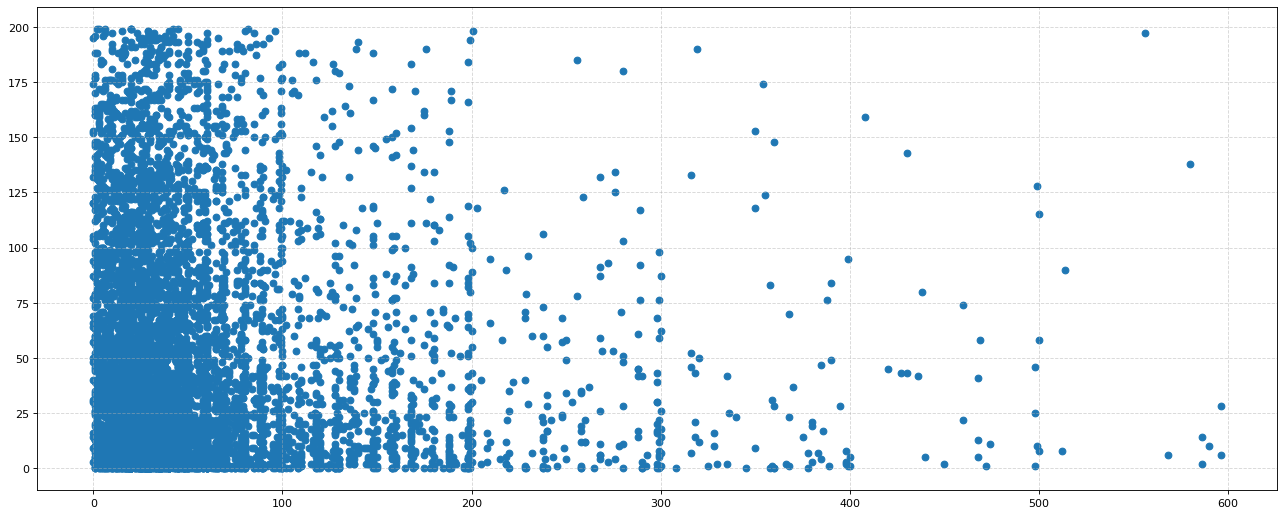

In [18]:
# 1、创建画布
matplotlib.pylab.figure(figsize=(20,8),dpi=80)
# 2、绘制图像
matplotlib.pylab.scatter(taobao_data["price"],taobao_data["comment"])
# 添加网格
matplotlib.pylab.grid(linestyle="--",alpha=0.5)
# 3、显示图像
matplotlib.pylab.show()

In [8]:
taobao_data_desc = taobao_data["price"]<100000

### 准备特征值和目标值

In [26]:
x = pandas.DataFrame(taobao_data["price"])
y = pandas.DataFrame(taobao_data["comment"])

### 划分数据集

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

### 特征工程（标准化）

In [28]:
from sklearn.preprocessing import StandardScaler
estimator = StandardScaler()
x_train = estimator.fit_transform(x_train)
x_test = estimator.transform(x_test)

### knn算法预估器流程

In [31]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors=5)
estimator.fit(x_train,y_train)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 模型评估

In [32]:
# 计算准确率
score = estimator.score(x_test,y_test)
print(score)

0.025266704098820886
